### HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. Using country socio-economic data we need to identify countries which are in the direst need of aid. 


In [12]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set()

In [14]:
# Importing all datasets
countries = pd.read_csv("Country-data.csv")

In [15]:
print(len(countries))

167


In [16]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [18]:
countries= countries.drop_duplicates(keep='first')

In [19]:
countries.info()
#No null values or duplicates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


In [20]:
#Convert exports, health and imports from % of GDP to per person like gdpp. For instance exports % of GDP to Exports per person

countries['exports']=countries['exports']*countries['gdpp']/100
countries['health']=countries['health']*countries['gdpp']/100
countries['imports']=countries['imports']*countries['gdpp']/100
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [21]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Checking for Outliers

In [22]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
countries.describe(percentiles=[.25,.5,.75,.90,.95,.99])

#some features like exports show signs of outliers. Will need to take care at some point

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


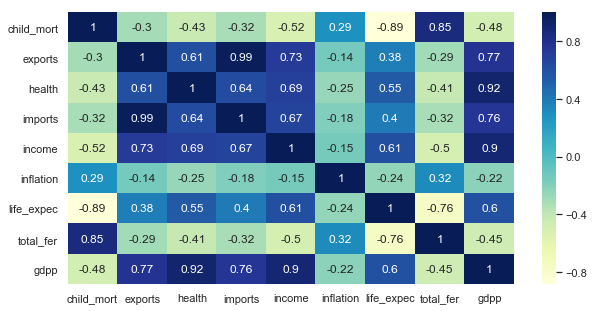

In [23]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,5))        # Size of the figure
sns.heatmap(countries.corr(),annot = True, cmap="YlGnBu")

# some high correlation going on

In [24]:
# Putting feature variable to dat2 and removing categorical country name
dat1 = countries.drop(['country'],axis=1)

dat1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [25]:
col=list(dat1.columns)
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

### Feature Standardisation

In [26]:
# Data Normalization
from sklearn.preprocessing import StandardScaler

dat2 = StandardScaler().fit_transform(dat1)

In [27]:
dat2=pd.DataFrame(dat2)
dat2.describe()
#Std dev = 1

,0,1,2,3,4,5,6,7,8
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,9.174298e-17,-2.260334e-17,3.589943e-17,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-4.140371e-01,-5.812404e-01,-4.491604e-01,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-3.891452e-01,-5.446513e-01,-4.055539e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-3.149097e-01,-4.091560e-01,-3.097338e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,-7.958645e-03,-4.442811e-02,7.713036e-02,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,9.839814e+00,4.235432e+00,9.716681e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


### Checking the Correlation Matrix

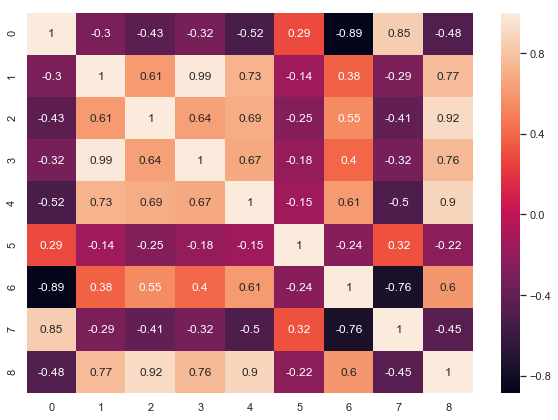

In [28]:
plt.figure(figsize = (10,7))
sns.heatmap(dat2.corr(),annot = True)

### PCA on the data

In [29]:
from sklearn.decomposition import PCA

pca = PCA()  
pca.fit_transform(dat2)  

array([[-2.63557499e+00,  1.47226739e+00, -5.49488868e-01, ...,
        -4.02106673e-01,  1.52246778e-02,  2.14526223e-02],
       [-2.42055643e-02, -1.42989187e+00, -1.41232909e-02, ...,
         2.62749660e-01,  3.75846547e-04, -3.38831728e-02],
       [-4.59557398e-01, -6.75495376e-01,  9.59354680e-01, ...,
         2.26680500e-01,  4.17041908e-02, -3.26636757e-02],
       ...,
       [-5.94449148e-01, -1.07633467e+00,  5.28874919e-01, ...,
         1.27676529e-01, -3.75433341e-02, -7.38600849e-02],
       [-1.80237235e+00,  5.88729402e-01,  1.18085099e+00, ...,
        -1.30849147e-01,  1.19704727e-02, -6.63306309e-03],
       [-2.64450479e+00,  1.57195347e+00, -1.74684997e-01, ...,
        -7.51162884e-01,  5.94382085e-03,  3.54065192e-02]])

In [30]:
explained_variance = pca.explained_variance_ratio_ 

In [99]:
explained_variance

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [31]:
pcs_df = pd.DataFrame({'Feature':col,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df

,Feature,PC1,PC2
0,child_mort,-0.316392,0.476267
1,exports,0.342887,0.397311
2,health,0.358535,0.155053
3,imports,0.344865,0.370781
4,income,0.380041,0.128384
5,inflation,-0.143085,0.221261
6,life_expec,0.343857,-0.369820
7,total_fer,-0.302842,0.459715
8,gdpp,0.399988,0.200624


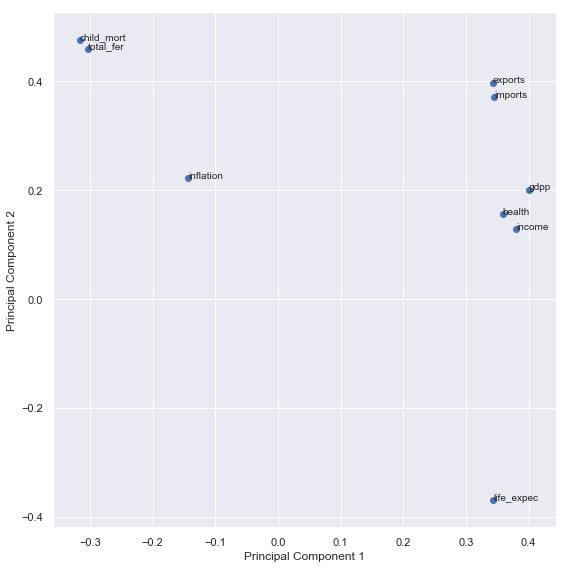

In [32]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

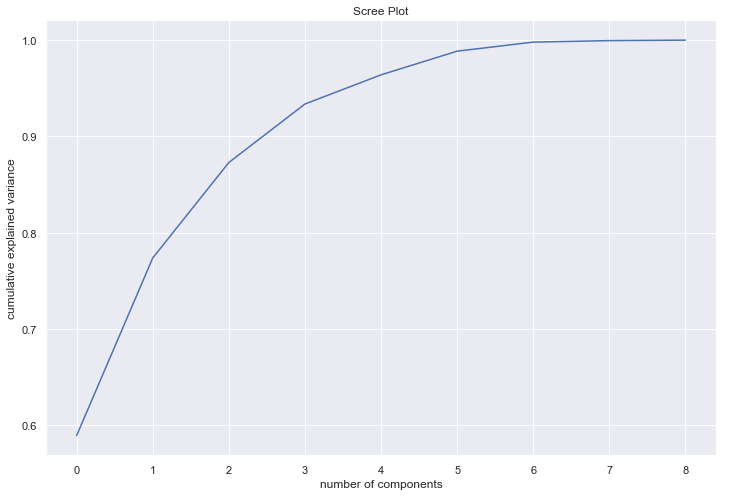

In [167]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree Plot")
plt.show()

#5 PC show approx 95% of information

In [34]:
#Finally let's go ahead and do dimenstionality reduction using the five Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [35]:
df_pca = pca_final.fit_transform(dat2)
df_pca.shape

(167, 5)

In [36]:
df_pca

array([[-2.63633780e+00,  1.47225984e+00, -5.48330498e-01,
         2.38302128e-01,  6.10029273e-02],
       [-2.37829162e-02, -1.43553539e+00, -1.54701978e-02,
        -4.28278354e-01, -1.54305141e-01],
       [-4.59228259e-01, -6.79704711e-01,  9.56536815e-01,
        -1.93531315e-01, -9.21275020e-02],
       [-2.72347181e+00,  2.17496646e+00,  5.97396852e-01,
         4.17695067e-01,  5.66944470e-02],
       [ 6.49103499e-01, -1.02640436e+00, -2.58645163e-01,
        -2.76882415e-01,  7.70873177e-02],
       [ 3.59501355e-02, -6.85691881e-01,  1.46841882e+00,
         4.60321765e-02, -9.31926507e-02],
       [-3.34457119e-01, -1.27861656e+00,  1.90805480e-01,
        -4.77018594e-01, -2.53557140e-01],
       [ 3.18403890e+00, -2.39407303e-01, -1.31692434e-01,
         1.67437937e+00,  8.73676249e-02],
       [ 3.81774167e+00,  2.62449000e-01, -2.58554292e-01,
         1.02465750e+00, -2.99611118e-01],
       [-4.68004699e-01, -4.93948233e-01,  6.11513868e-01,
        -2.76290913e-01

In [37]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [47]:
pcs_df5 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [48]:
country_name=pd.DataFrame(countries['country'])
country_name.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [49]:
pcs_df5=pd.merge(country_name,pcs_df5, left_index=True,right_index=True)

In [50]:
pcs_df5.tail()

,country,PC1,PC2,PC3,PC4,PC5
162,Vanuatu,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251
163,Venezuela,-0.314505,-0.019143,3.680854,0.016772,-0.475066
164,Vietnam,-0.594560,-1.084130,0.528668,-0.478067,-0.373132
165,Yemen,-1.802840,0.584669,1.179551,0.051510,-0.274608
166,Zambia,-2.645604,1.571917,-0.169911,0.161735,0.077092


(149, 6)

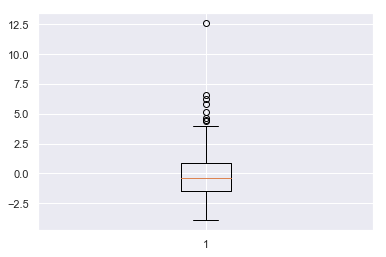

In [51]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df5.PC1)
Q1 = pcs_df5.PC1.quantile(0.05)
Q3 = pcs_df5.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df5 = pcs_df5[(pcs_df5.PC1 >= Q1) & (pcs_df5.PC1 <= Q3)]
pcs_df5.shape  #167-149 = 18 outlier countries removed

(133, 6)

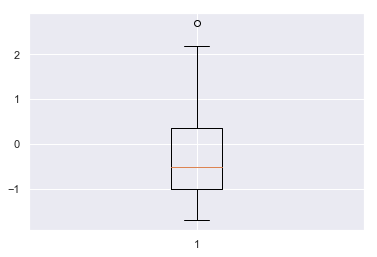

In [52]:
plt.boxplot(pcs_df5.PC2)
Q1 = pcs_df5.PC2.quantile(0.05)
Q3 = pcs_df5.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df5 = pcs_df5[(pcs_df5.PC2 >= Q1) & (pcs_df5.PC2 <= Q3)]
pcs_df5.shape  #149-133 = 16 outlier countries removed

(119, 6)

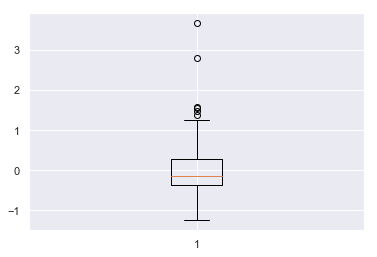

In [53]:

plt.boxplot(pcs_df5.PC3)
Q1 = pcs_df5.PC3.quantile(0.05)
Q3 = pcs_df5.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df5 = pcs_df5[(pcs_df5.PC3 >= Q1) & (pcs_df5.PC3 <= Q3)]
pcs_df5.shape  #133-119 = 24 outlier countries removed

(107, 6)

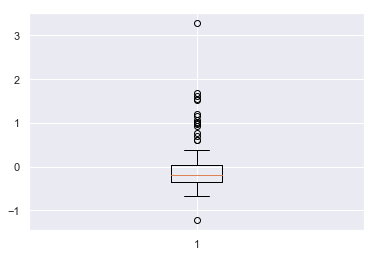

In [54]:

plt.boxplot(pcs_df5.PC4)
Q1 = pcs_df5.PC4.quantile(0.05)
Q3 = pcs_df5.PC4.quantile(0.95)
IQR = Q3 - Q1
pcs_df5 = pcs_df5[(pcs_df5.PC4 >= Q1) & (pcs_df5.PC4 <= Q3)]
pcs_df5.shape  #119-107 = 12 outlier countries removed

(95, 6)

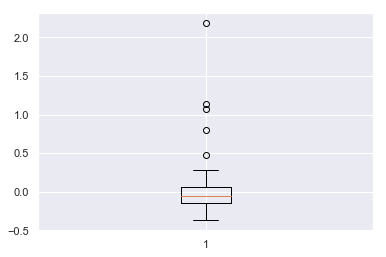

In [55]:

plt.boxplot(pcs_df5.PC5)
Q1 = pcs_df5.PC5.quantile(0.05)
Q3 = pcs_df5.PC5.quantile(0.95)
IQR = Q3 - Q1
pcs_df5 = pcs_df5[(pcs_df5.PC5 >= Q1) & (pcs_df5.PC5 <= Q3)]
pcs_df5.shape  #107-95 = 12 outlier countries removed

##### pcs_df5.shape

#167-95 = 72 outlier countries dropped

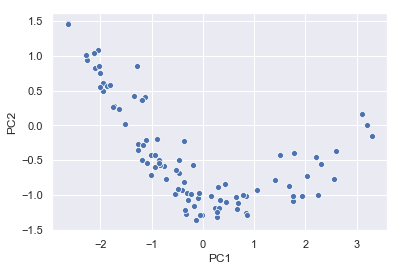

In [56]:
#Visualising the points on the PCs - possibly slit two groups: positve slope and negative slope

sns.scatterplot(x='PC1',y='PC2',data=pcs_df5)

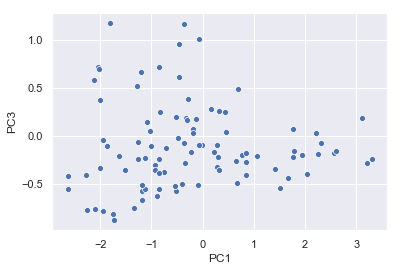

In [58]:
#Try other PC combinations. Visualising the points on the PCs - no visible clustering

sns.scatterplot(x='PC1',y='PC3',data=pcs_df5)

## Clustering 

In [59]:
dat3=pcs_df5.drop(['country'],axis=1)
#Remove metadata - country name. dat3 PCs without outliers

In [60]:
dat3

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087
6,-0.334457,-1.278617,0.190805,-0.477019,-0.253557
9,-0.468005,-0.493948,0.611514,-0.276291,0.115536
10,1.499464,-0.425404,-0.543189,0.254181,-0.109091
12,-1.015269,-0.713954,-0.102950,-0.354866,-0.254570
13,0.844643,-1.009520,-0.411579,-0.116555,-0.202066
16,-0.403754,-0.923973,-0.505497,-0.355780,-0.093195
18,-0.715992,-0.770401,-0.127548,-0.344813,-0.149521


In [61]:
pcs_df5

,country,PC1,PC2,PC3,PC4,PC5
0,Afghanistan,-2.636338,1.472260,-0.548330,0.238302,0.061003
2,Algeria,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
4,Antigua and Barbuda,0.649103,-1.026404,-0.258645,-0.276882,0.077087
6,Armenia,-0.334457,-1.278617,0.190805,-0.477019,-0.253557
9,Azerbaijan,-0.468005,-0.493948,0.611514,-0.276291,0.115536
10,Bahamas,1.499464,-0.425404,-0.543189,0.254181,-0.109091
12,Bangladesh,-1.015269,-0.713954,-0.102950,-0.354866,-0.254570
13,Barbados,0.844643,-1.009520,-0.411579,-0.116555,-0.202066
16,Belize,-0.403754,-0.923973,-0.505497,-0.355780,-0.093195
18,Bhutan,-0.715992,-0.770401,-0.127548,-0.344813,-0.149521


In [62]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [68]:
#Let's check the Hopkins measure
hopkins(dat3)

#Hopkins measure stablizing at 0.7-0.8. SInce greater than 0.5 dataset should have good tendency to form clusters.

0.7500393472468446

### K- means Clustering

In [69]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [74]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3)
    sse_.append([k, silhouette_score(dat3, kmeans.labels_)])

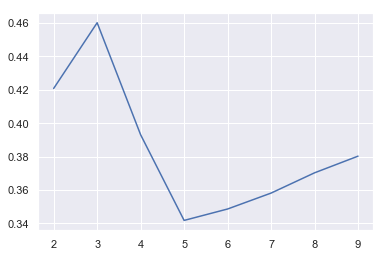

In [75]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

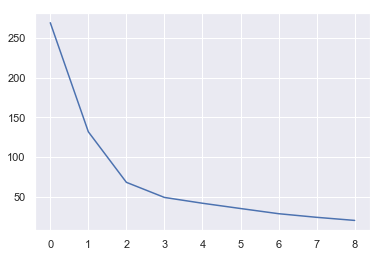

In [76]:

#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [78]:
## From the above analysis we find that K=3 as optimum for silhouette score analysis AND k=2 OR 3 seems given by elbow. 
#Taking K=3

In [79]:
#Let's perform K means using K=3
model_clus3 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus3.fit(dat3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [80]:
dat_temp=pcs_df5 #DF to help merge
dat_temp.index = pd.RangeIndex(len(dat_temp.index))

In [82]:
dat_km = pd.concat([dat_temp, pd.DataFrame(model_clus3.labels_)], axis=1)
dat_km.columns = ['country','PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km

,country,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,Algeria,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
2,Antigua and Barbuda,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1
3,Armenia,-0.334457,-1.278617,0.190805,-0.477019,-0.253557,1
4,Azerbaijan,-0.468005,-0.493948,0.611514,-0.276291,0.115536,1
5,Bahamas,1.499464,-0.425404,-0.543189,0.254181,-0.109091,2
6,Bangladesh,-1.015269,-0.713954,-0.102950,-0.354866,-0.254570,1
7,Barbados,0.844643,-1.009520,-0.411579,-0.116555,-0.202066,1
8,Belize,-0.403754,-0.923973,-0.505497,-0.355780,-0.093195,1
9,Bhutan,-0.715992,-0.770401,-0.127548,-0.344813,-0.149521,1


In [83]:
dat_km['ClusterID'].value_counts()

1    50
0    29
2    16
Name: ClusterID, dtype: int64

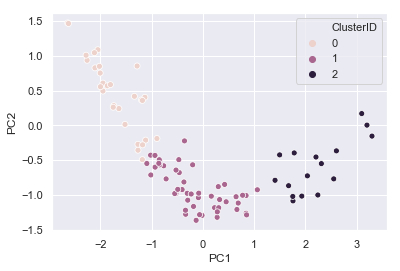

In [84]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

# PC1 has large effect on clustering

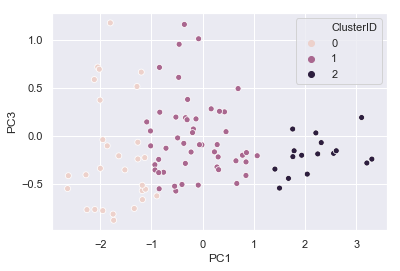

In [120]:
sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',data=dat_km)

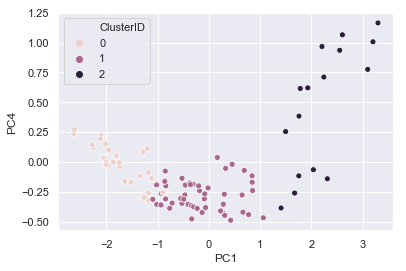

In [121]:
sns.scatterplot(x='PC1',y='PC4',hue='ClusterID',legend='full',data=dat_km)

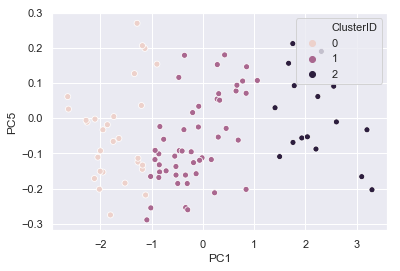

In [122]:
sns.scatterplot(x='PC1',y='PC5',hue='ClusterID',legend='full',data=dat_km)

In [ ]:
#Most clear clustering visual is PC1 and PC2 hue. Low PC1 and High PC2 clustering is the most under-developed countries

In [85]:
#So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

dat4=pd.merge(countries,dat_km, how='inner', on='country')
dat4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.334457,-1.278617,0.190805,-0.477019,-0.253557,1
4,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.80,69.1,1.92,5840,-0.468005,-0.493948,0.611514,-0.276291,0.115536,1


In [86]:
dat5=dat4.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat5


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0
1,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,1
3,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220,1
4,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840,1
5,Bahamas,13.8,9800.0000,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,2
6,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758,1
7,Barbados,14.2,6320.0000,1275.2000,7792.000,15300,0.321,76.7,1.78,16000,1
8,Belize,18.8,2525.8800,225.6800,2495.500,7880,1.140,71.4,2.71,4340,1
9,Bhutan,42.7,926.5000,113.3600,1541.260,6420,5.990,72.1,2.38,2180,1


From Above its shows K-means has created three clusters
0- under developed Countries
1 - Developing Country
2- developed countries
Under developed countries have low PC1 and high PC2


## Analysis of the clusters

In [88]:
clu_child = 	pd.DataFrame(dat5.groupby(["ClusterID"]).child_mort.mean())
clu_exports= 	pd.DataFrame(dat5.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(dat5.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(dat5.groupby(["ClusterID"]).imports.mean())
clu_income = pd.DataFrame(dat5.groupby(["ClusterID"]).income.mean())
clu_inflatn = pd.DataFrame(dat5.groupby(["ClusterID"]).inflation.mean())
clu_life = pd.DataFrame(dat5.groupby(["ClusterID"]).life_expec.mean())
clu_fer = pd.DataFrame(dat5.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = pd.DataFrame(dat5.groupby(["ClusterID"]).gdpp.mean())


In [89]:
df = pd.concat([pd.Series([0,1]),clu_child,clu_exports,clu_health,clu_imports,clu_income ,clu_inflatn ,clu_life ,clu_fer ,clu_gdpp], axis=1)

In [90]:
df_columns=col

In [91]:
df

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,,
0,0.0,64.613793,914.657128,135.066448,895.874038,4615.517241,9.456207,62.941379,4.184483,2169.206897
1,1.0,21.286000,2704.532000,414.472712,2922.133680,11930.000000,5.708420,73.424000,2.358000,6450.760000
2,NaN,4.781250,12269.237500,2799.860625,12331.012500,31943.750000,1.143063,79.675000,1.706250,30606.250000


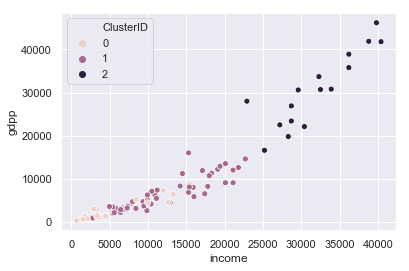

In [92]:
#sns.scatterplot(x='income',y='gdpp',data=dat5)
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=dat5)

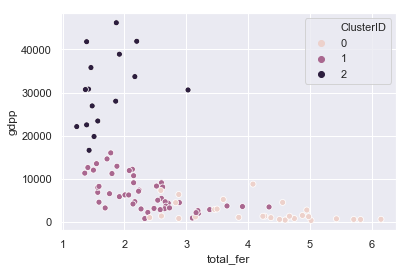

In [93]:
#sns.scatterplot(x='total_fer',y='gdpp',data=dat5)
sns.scatterplot(x='total_fer',y='gdpp',hue='ClusterID',legend='full',data=dat5)

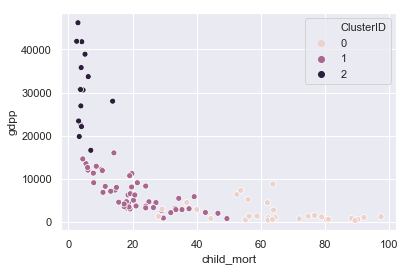

In [94]:
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data=dat5)

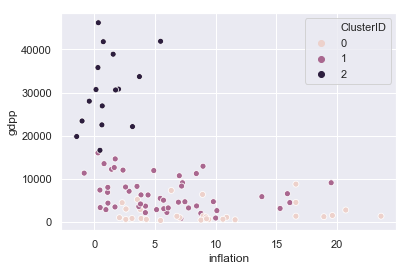

In [95]:
sns.scatterplot(x='inflation',y='gdpp',hue='ClusterID',legend='full',data=dat5)

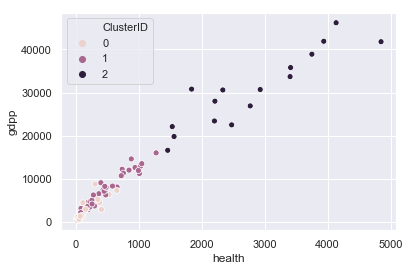

In [168]:
sns.scatterplot(x='health',y='gdpp',hue='ClusterID',legend='full',data=dat5)

In [ ]:
#gdpp, child_mort, total_fer, inflation, income, health, imports and exports show large variation between clustering

In [108]:
#Let's use the concept of binning - using gdpp, child_mort, total_fer, inflation, income
fin=countries[countries['income']<=4615]
fin=fin[fin['gdpp']<= 2169]
fin=fin[fin['total_fer']>= 4.18]
fin=fin[fin['child_mort']>= 64.6]
fin=fin[fin['inflation']>= 9.45]
fin=fin[fin['imports']<= 895]
fin=fin[fin['exports']<= 914]
fin=fin[fin['health']<= 135]

In [109]:
fin
#Final countries with poorer than poor cluster (less than centroid of cluster 0)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.3,57.7,6.26,231
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.8,57.5,6.54,334
59,Ghana,74.7,386.4500,68.3820,601.290,3060,16.6,62.2,4.27,1310
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.1,58.0,5.34,648
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.1,53.1,5.31,459
99,Mauritania,97.4,608.4000,52.9200,734.400,3320,18.9,68.2,4.98,1200
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.2,55.0,5.20,399
142,Sudan,76.7,291.5600,93.5360,254.560,3370,19.6,66.3,4.88,1480
155,Uganda,81.0,101.7450,53.6095,170.170,1540,10.6,56.8,6.15,595
166,Zambia,83.1,540.2000,85.9940,451.140,3280,14.0,52.0,5.40,1460


In [110]:
fin=pd.DataFrame(fin)

In [111]:
dat6=fin.drop(['country'],axis=1)

In [112]:
dat7=StandardScaler().fit_transform(dat6)
dat7=pd.DataFrame(dat7)
dat7.columns=col
dat7

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.189827,-1.156976,-1.102219,-1.032913,-1.062169,-1.071320,-0.193412,1.251564,-1.237876
1,0.734549,-0.556574,-1.118551,-0.670377,-1.202368,1.515675,-0.232883,1.675311,-1.018274
2,-0.969770,0.725738,0.701244,1.432221,1.014592,0.237395,0.694703,-1.760060,1.062621
3,0.445682,-0.252587,-0.878861,-0.118830,-0.676847,0.085219,-0.134204,-0.140744,-0.348806
4,-0.317755,-0.724453,-0.952512,-0.696793,-0.821569,-1.132191,-1.101262,-0.186146,-0.751766
5,-0.033013,1.867939,0.030702,2.074691,1.249765,0.937405,1.878856,-0.685561,0.828094
6,2.550290,-0.918054,0.002470,-0.805565,-0.649711,0.420006,-0.726281,-0.352617,-0.879690
7,-0.887237,0.237414,1.792099,-0.241310,1.294990,1.150452,1.503874,-0.836899,1.425072
8,-0.709789,-0.739413,0.060604,-0.648628,-0.360267,-1.588719,-0.371035,1.085093,-0.461805
9,-0.623129,1.516967,1.465025,0.707505,1.213584,-0.553921,-1.318357,-0.049942,1.382430


In [113]:
fin_pca = pca_final.fit_transform(dat7)

In [114]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(fin_pca)
pc

array([[-2.75525692, -2.28649416,  2.91683884, -0.94170223, -1.87415934,
         3.25755879, -1.84370095,  2.80240505, -1.40687865,  2.13138957],
       [-0.64701427,  1.6551493 , -0.21555623,  0.52641473, -1.07623696,
         1.36230189,  1.5306775 ,  0.26109504, -1.696264  , -1.700567  ],
       [ 0.94185928,  0.60434956,  0.0829935 ,  0.08716509, -0.0613598 ,
         1.04841293, -1.97209833, -0.07152878,  0.49249627, -1.15228972],
       [-0.19258099, -0.3360651 ,  0.38886415,  0.49123114,  0.54546891,
         1.00496908,  0.06304654, -2.01941461, -0.40618879,  0.46066967],
       [-0.16661139,  1.19691057, -0.90144698, -0.34437066, -0.71495546,
         0.17390497, -0.39746207, -0.27414491,  0.09389585,  1.33428007]])

In [115]:
pcs_fin_df5 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})
pcs_fin_df5

,PC1,PC2,PC3,PC4,PC5
0,-2.755257,-0.647014,0.941859,-0.192581,-0.166611
1,-2.286494,1.655149,0.604350,-0.336065,1.196911
2,2.916839,-0.215556,0.082993,0.388864,-0.901447
3,-0.941702,0.526415,0.087165,0.491231,-0.344371
4,-1.874159,-1.076237,-0.061360,0.545469,-0.714955
5,3.257559,1.362302,1.048413,1.004969,0.173905
6,-1.843701,1.530678,-1.972098,0.063047,-0.397462
7,2.802405,0.261095,-0.071529,-2.019415,-0.274145
8,-1.406879,-1.696264,0.492496,-0.406189,0.093896
9,2.131390,-1.700567,-1.152290,0.460670,1.334280


In [116]:
country_name=(fin['country']).reset_index(drop=True)
country_name=pd.DataFrame(country_name)
country_name

,country
0,Burundi
1,"Congo, Dem. Rep."
2,Ghana
3,Guinea
4,Malawi
5,Mauritania
6,Sierra Leone
7,Sudan
8,Uganda
9,Zambia


In [117]:
pcs_fin_df5=pd.merge(country_name,pcs_fin_df5, left_index=True,right_index=True)

In [118]:
pcs_fin_df5

,country,PC1,PC2,PC3,PC4,PC5
0,Burundi,-2.755257,-0.647014,0.941859,-0.192581,-0.166611
1,"Congo, Dem. Rep.",-2.286494,1.655149,0.604350,-0.336065,1.196911
2,Ghana,2.916839,-0.215556,0.082993,0.388864,-0.901447
3,Guinea,-0.941702,0.526415,0.087165,0.491231,-0.344371
4,Malawi,-1.874159,-1.076237,-0.061360,0.545469,-0.714955
5,Mauritania,3.257559,1.362302,1.048413,1.004969,0.173905
6,Sierra Leone,-1.843701,1.530678,-1.972098,0.063047,-0.397462
7,Sudan,2.802405,0.261095,-0.071529,-2.019415,-0.274145
8,Uganda,-1.406879,-1.696264,0.492496,-0.406189,0.093896
9,Zambia,2.131390,-1.700567,-1.152290,0.460670,1.334280


In [127]:
pcs_fin_df5[pcs_fin_df5.PC1<-1].sort_values(by=(['PC2']), ascending=False)
#Most underdeveloped 5. 
#PC2>-0.5 and lowest PC1 countries are in the direst need of help. See PC1 and PC2 hue clustering before

,country,PC1,PC2,PC3,PC4,PC5
1,"Congo, Dem. Rep.",-2.286494,1.655149,0.604350,-0.336065,1.196911
6,Sierra Leone,-1.843701,1.530678,-1.972098,0.063047,-0.397462
0,Burundi,-2.755257,-0.647014,0.941859,-0.192581,-0.166611
4,Malawi,-1.874159,-1.076237,-0.061360,0.545469,-0.714955
8,Uganda,-1.406879,-1.696264,0.492496,-0.406189,0.093896


In [175]:
pcs_fin_df5[pcs_fin_df5.PC1<-1].sort_values(by=(['PC2']), ascending=False).country.head()
# 5 poorest countires

1    Congo, Dem. Rep.
6        Sierra Leone
0             Burundi
4              Malawi
8              Uganda
Name: country, dtype: object

## Heirarchical Clustering

In [131]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [139]:
dat3.shape

(95, 5)

In [142]:
country_name=list(pcs_df5.country)
len(country_name)

95

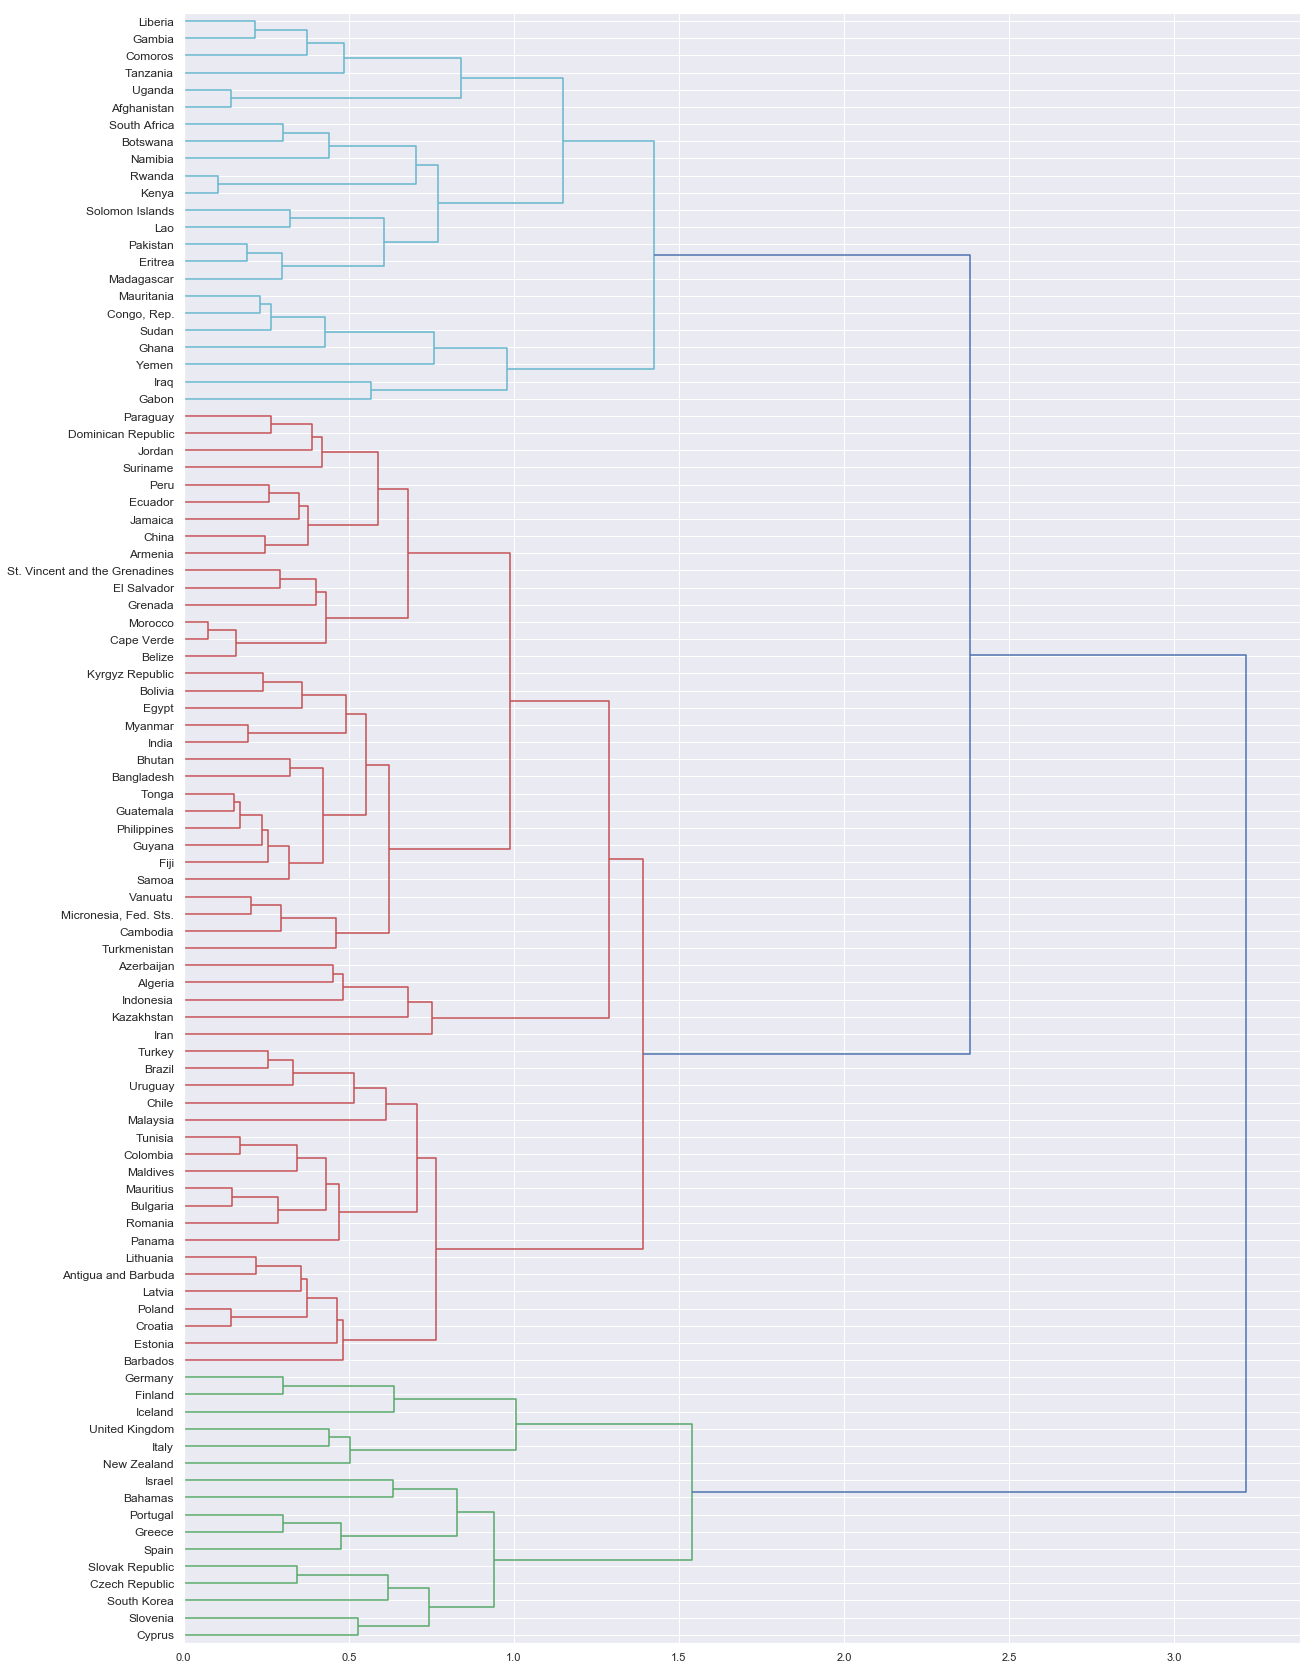

In [146]:
# heirarchical clustering on dat3 - scaled, PCA and outliers removed
plt.figure(figsize = (20,30))
mergings_single = linkage(dat3, method = "single", metric='euclidean')
dendrogram(mergings, orientation='right',leaf_font_size=12,labels=country_name)

plt.show()

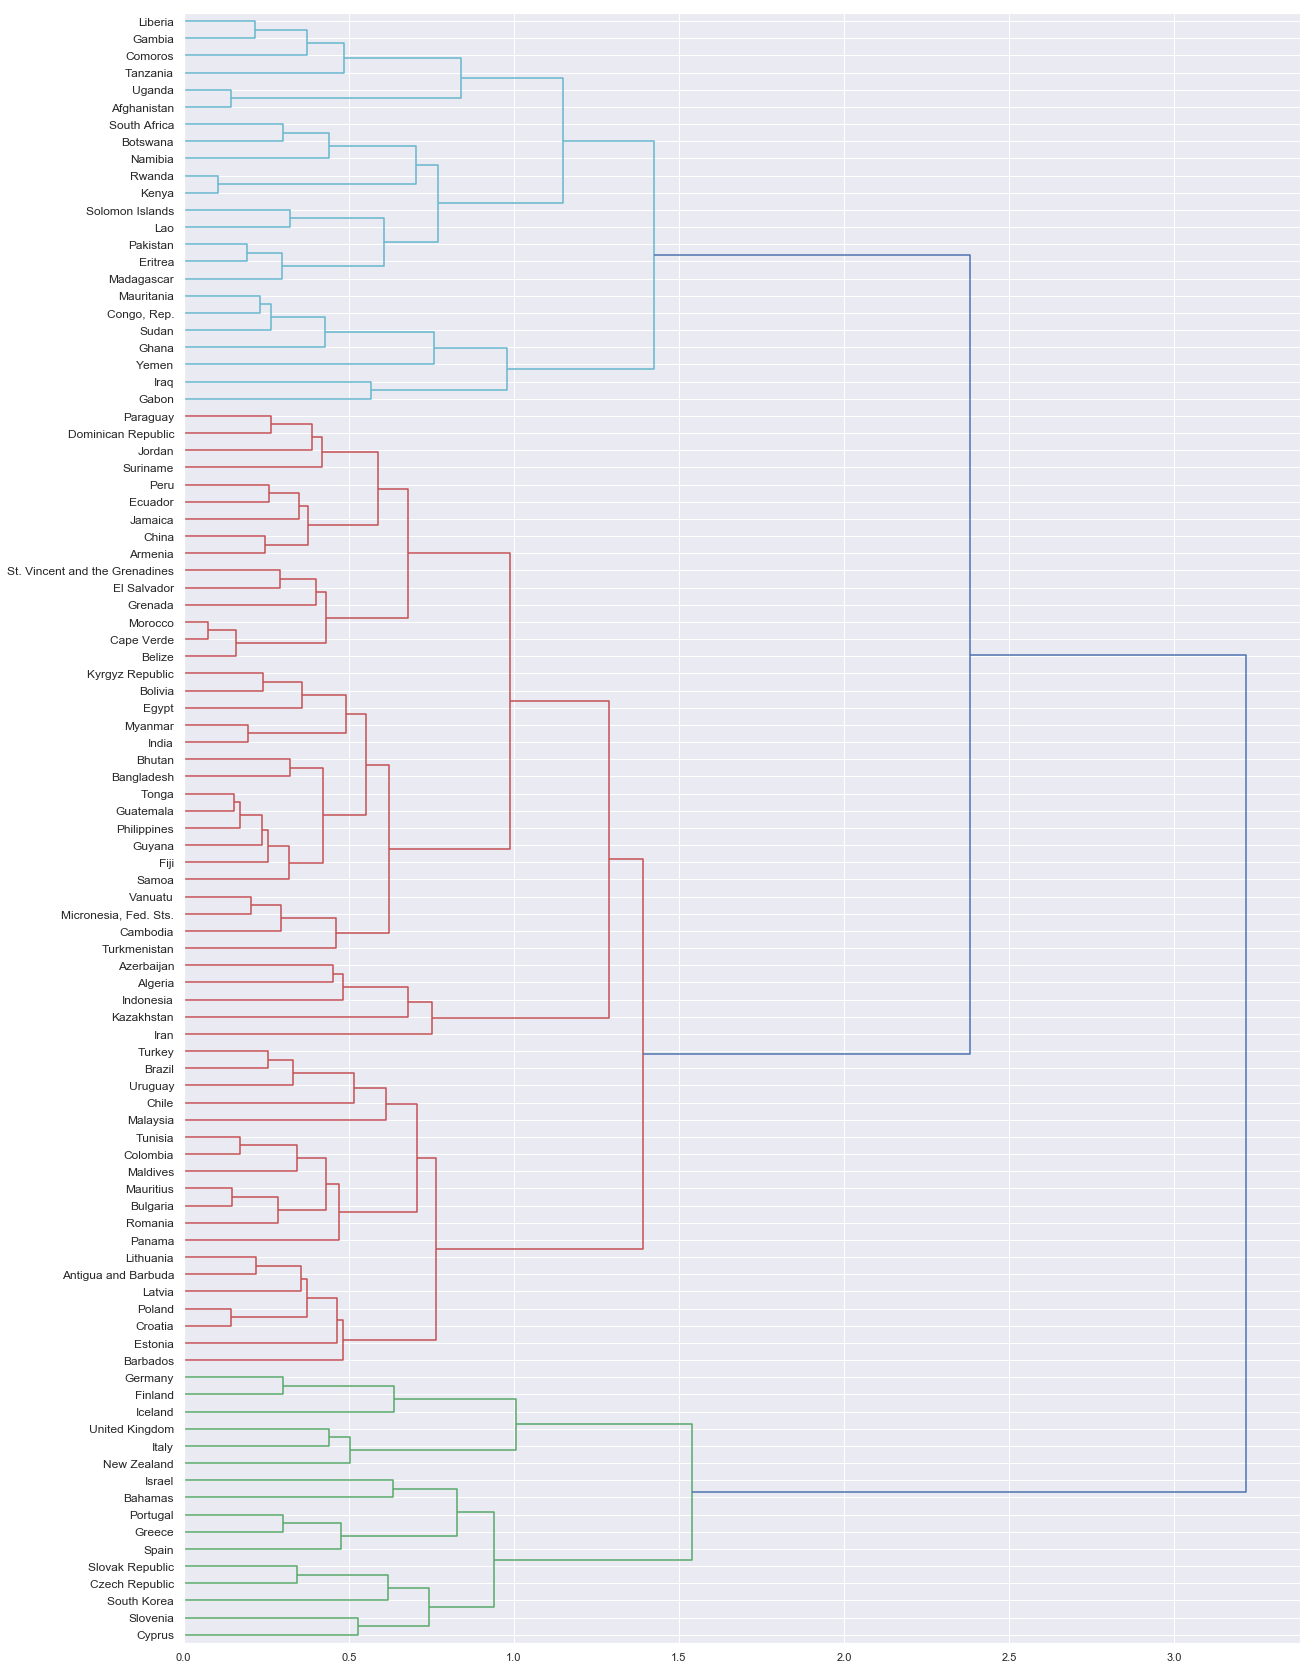

In [147]:
plt.figure(figsize = (20,30))
mergings_complete = linkage(dat3, method = "complete", metric='euclidean')
dendrogram(mergings, orientation='right',leaf_font_size=12,labels=country_name)

plt.show()

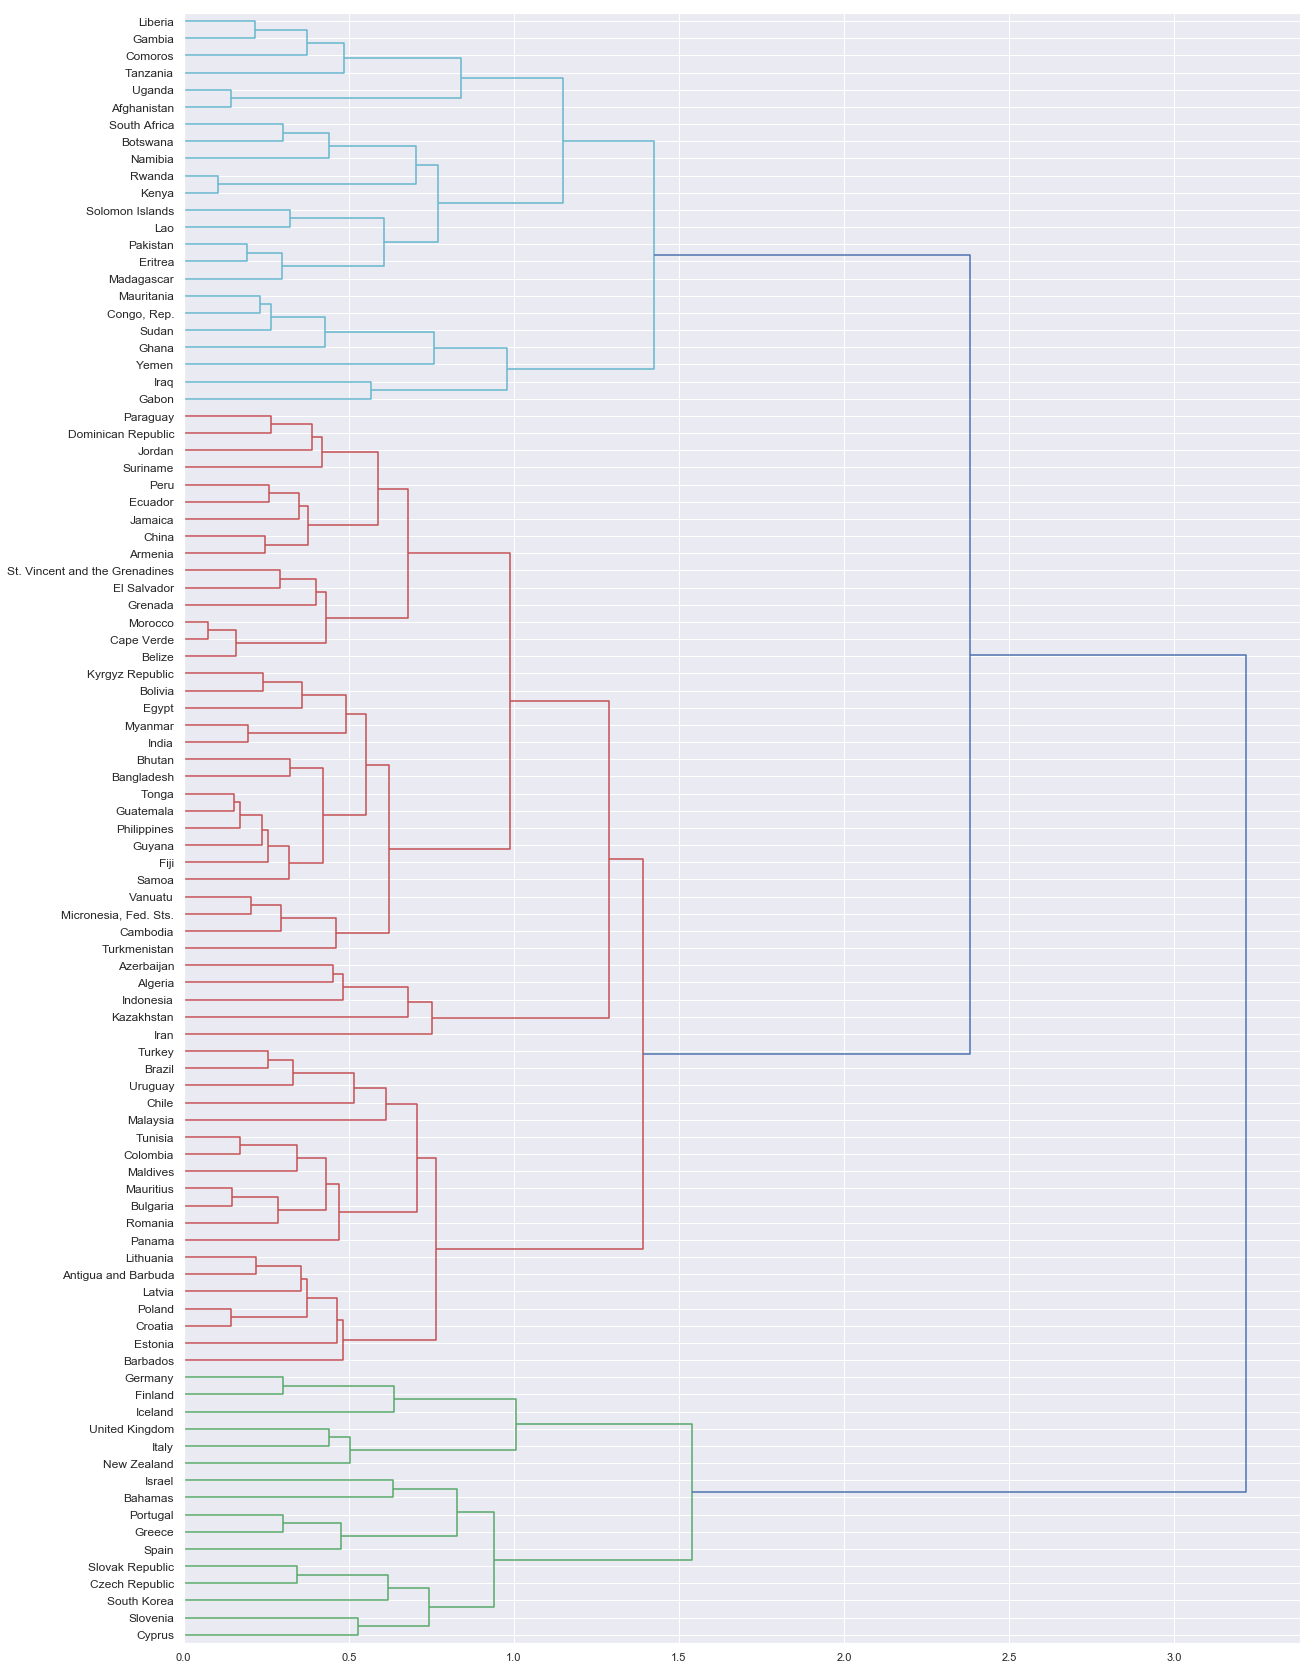

In [172]:
plt.figure(figsize = (20,30))
mergings_average = linkage(dat3, method = "average", metric='euclidean')
dendrogram(mergings, orientation='right',leaf_font_size=12,labels=country_name)

plt.show()

In [ ]:
#Dendograms look identical and 3 large groups formed consistently

In [149]:
clusterCut = pd.Series(cut_tree(mergings_average, n_clusters = 3).reshape(-1,))

In [155]:
dat8 = pd.concat([pcs_df5, clusterCut], axis=1)
dat8.columns = ['country', 'PC1', 'PC2', 'PC3','PC4','PC5', 'ClusterID']

In [178]:
dat8

,country,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,Algeria,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
2,Antigua and Barbuda,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1
3,Armenia,-0.334457,-1.278617,0.190805,-0.477019,-0.253557,1
4,Azerbaijan,-0.468005,-0.493948,0.611514,-0.276291,0.115536,1
5,Bahamas,1.499464,-0.425404,-0.543189,0.254181,-0.109091,2
6,Bangladesh,-1.015269,-0.713954,-0.102950,-0.354866,-0.254570,1
7,Barbados,0.844643,-1.009520,-0.411579,-0.116555,-0.202066,1
8,Belize,-0.403754,-0.923973,-0.505497,-0.355780,-0.093195,1
9,Bhutan,-0.715992,-0.770401,-0.127548,-0.344813,-0.149521,1


In [157]:
dat9=pd.merge(countries,dat8, how='inner', on='country')
dat9

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
2,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1
3,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220,-0.334457,-1.278617,0.190805,-0.477019,-0.253557,1
4,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840,-0.468005,-0.493948,0.611514,-0.276291,0.115536,1
5,Bahamas,13.8,9800.0000,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,1.499464,-0.425404,-0.543189,0.254181,-0.109091,2
6,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758,-1.015269,-0.713954,-0.102950,-0.354866,-0.254570,1
7,Barbados,14.2,6320.0000,1275.2000,7792.000,15300,0.321,76.7,1.78,16000,0.844643,-1.009520,-0.411579,-0.116555,-0.202066,1
8,Belize,18.8,2525.8800,225.6800,2495.500,7880,1.140,71.4,2.71,4340,-0.403754,-0.923973,-0.505497,-0.355780,-0.093195,1
9,Bhutan,42.7,926.5000,113.3600,1541.260,6420,5.990,72.1,2.38,2180,-0.715992,-0.770401,-0.127548,-0.344813,-0.149521,1


In [158]:
dat9['ClusterID'].value_counts()

#From Above its shows K-means has created three clusters
#0- under developed Countries
#2 - Developing Country
#0- developed countries


1    56
0    23
2    16
Name: ClusterID, dtype: int64

### Kmeans also made 3 clusters. The most underdeveloped countries count was 29 countries

1    50
0    29
2    16
Name: ClusterID, dtype: int64

## Analysis of Hierarichal Clusters

In [161]:
clu_child1 = 	pd.DataFrame(dat9.groupby(["ClusterID"]).child_mort.mean())
clu_exports1= 	pd.DataFrame(dat9.groupby(["ClusterID"]).exports.mean())
clu_health1 = 	pd.DataFrame(dat9.groupby(["ClusterID"]).health.mean())
clu_imports1 = 	pd.DataFrame(dat9.groupby(["ClusterID"]).imports.mean())
clu_income1 =  pd.DataFrame(dat9.groupby(["ClusterID"]).income.mean())
clu_inflatn1 = pd.DataFrame(dat9.groupby(["ClusterID"]).inflation.mean())
clu_life1 = pd.DataFrame(dat9.groupby(["ClusterID"]).life_expec.mean())
clu_fer1 = pd.DataFrame(dat9.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp1 = pd.DataFrame(dat9.groupby(["ClusterID"]).gdpp.mean())

In [162]:
df1 = pd.concat([pd.Series([0,1]),clu_child1,clu_exports1,clu_health1,clu_imports1,clu_income1 ,clu_inflatn1 ,clu_life1 ,clu_fer1 ,clu_gdpp1], axis=1)

In [165]:
df1
#Hierarichal cluster average/ centroid

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,,
0,0.0,68.478261,884.774513,135.873852,838.634174,4650.869565,10.711304,62.169565,4.507391,2152.739130
1,1.0,24.341071,2525.032909,384.204714,2728.543662,11131.785714,5.594482,72.617857,2.421071,5998.785714
2,NaN,4.781250,12269.237500,2799.860625,12331.012500,31943.750000,1.143063,79.675000,1.706250,30606.250000


In [166]:
df
#K-Means cluster average/ centroid

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,,
0,0.0,64.613793,914.657128,135.066448,895.874038,4615.517241,9.456207,62.941379,4.184483,2169.206897
1,1.0,21.286000,2704.532000,414.472712,2922.133680,11930.000000,5.708420,73.424000,2.358000,6450.760000
2,NaN,4.781250,12269.237500,2799.860625,12331.012500,31943.750000,1.143063,79.675000,1.706250,30606.250000


In [ ]:
# From above we see the cluster centroids match well (small variation) and hence previous analysis holds